<h1>1.1 왜 머신러닝인가?</h1> <br/>
 <h2>&nbsp;1.1.1 머신러닝으로 풀 수 있는 문제</h2> <br/>
  &nbsp;&nbsp;지도학습 : 입력과 출력이 제공되고 알고리즘은 주어진 입력에서 원하는 출력을 만드는 방법을 찾음 <br/>
  &nbsp;&nbsp;비지도학습 : 입력은 주어지지만 출력은 제공되지 않음 <br/><br/>
  
  &nbsp;&nbsp;행 : 샘플(sample), 데이터 포인트(data point) <br/>
  &nbsp;&nbsp;열 : 특성(feature)


<h1>1.4 필수 라이브러리와 도구들</h1> <br/>
 <h2>&nbsp;1.4.2 Numpy</h2> <br/>
 &nbsp;&nbsp;파이썬으로 과학 계산을 하기위해 꼭 필요한 패키지 <br/>
 &nbsp;&nbsp;다차원(n-차원)배열의 ndarray 클래스, 배열의 모든 원소는 동일한 데이터 타입이어야 함

In [1]:
import numpy as np

x = np.array([[1,2,3], [4,5,6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


<h2>&nbsp;1.4.3 SciPy</h2> <br/>
&nbsp;&nbsp;과학 계산용 함수를 모아놓은 파이썬 패키지 <br/>
&nbsp;&nbsp;scipy.sparse, 희소 행렬(sparse matrix)

In [2]:
from scipy import sparse

eye = np.eye(4)
sparse_matrix = sparse.csr_matrix(eye)
print("SciPy의 CSR 행렬:\n{}".format(sparse_matrix))

SciPy의 CSR 행렬:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


&nbsp;&nbsp;COO포맷

In [5]:
data = np.ones(4) #[1, 1, 1, 1]
row_indices = np.arange(4) #[0, 1, 2, 3]
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO 표현:\n{}".format(eye_coo))

COO 표현:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


<h2>&nbsp;1.4.4 matplotlib</h2> <br/>
&nbsp;&nbsp;과학 계산용 그래프 라이브러리 <br/>
&nbsp;&nbsp;브라우저에서 이미지를 바로보기 위해서는 %matplotlib notebook 혹은 %matplotlib inline 명령어 사용

<IPython.core.display.Javascript object>


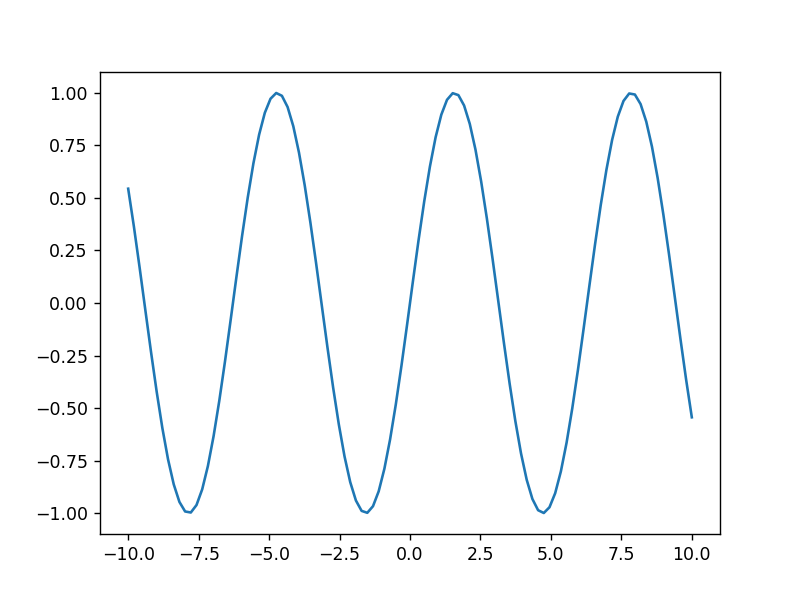

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = np.sin(x)
plt.plot(x,y)

<h2>&nbsp;1.4.5 pandas</h2> <br/>
&nbsp;&nbsp;데이터 처리와 분석을 위한 파이썬 라이브러리 <br/>
&nbsp;&nbsp;DataFrame이라는 데이터 구조를 기반으로 만들어짐, numpy와는 달리 <b>각 열의 타입이 달라도 됨</b>

In [10]:
import pandas as pd

data = {'Name' : ["Jeongwon", "Jiwon"],
        'Location' : ["Seoul", "Daejeon"],
        'Age' : [23, 20]
       }

data_pandas = pd.DataFrame(data)
display(data_pandas)

,Name,Location,Age
0,Jeongwon,Seoul,23
1,Jiwon,Daejeon,20


In [11]:
display(data_pandas[data_pandas.Age == 23])

,Name,Location,Age
0,Jeongwon,Seoul,23


<h1>1.7 첫 번째 애플리케이션: 붓꽃의 품종 분류</h1> <br/>
&nbsp;지도학습, 분류(Classification) <br/>
&nbsp;training set(75%), test set(25%) -> train_test_split<br/> 
&nbsp;산점도 <br/>
&nbsp;k-NN 분류기 <br/>
&nbsp;&nbsp;fit : 훈련 데이터셋으로부터 모델을 만들기 위해서<br/>
&nbsp;&nbsp;predict : 예측을 위해서<br/>
&nbsp;&nbsp;score : 테스트 세트의 정확도 계산<br/>